In [ ]:
### step 1: import tensorflow & verify GPU is correctly set up


In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.list_physical_devices('GPU')
gpus

I0000 00:00:1721303139.084768    3419 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721303139.100018    3419 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721303139.100050    3419 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
## step 2: Set GPU memory growth

In [3]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
### for allocating memory dinamically to the gpu as needed instead of allocating the entire memory at start

In [ ]:
## step 3:Remove Bad images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data'
image_extensions = ['jpeg', 'jpg', 'bmp', 'png']
os.listdir(os.path.join(data_dir,'happy'))

['images4.jpg',
 'hand-drawn-happy-people-jumping_23-2149092878.jpg',
 '360_F_230964014_ngHsPlPbY2MCa0enKBex6YLNdTB24pki.jpg',
 'Woman-Smiling-At-Dinner-Party.jpg',
 'hand-drawn-happy-friends-jumping_23-2149095224.jpg',
 'Happy.jpg',
 'image22.jpeg',
 'image12.jpeg',
 'maxresdefault.jpg',
 '1000_F_38064890_H0vhLXPugCMaxRnEzXtASpmml1NKhqrp.jpg',
 '1920px-face-smile.svg_.png',
 'images2.jpg',
 'getty_107808334_121413.jpg',
 '56f455011e0000b300705475.jpeg',
 'image11.jpeg',
 'image49.jpeg',
 'getty_478389113_970647970450091_99776.jpg',
 'images11.jpg',
 'image44.jpeg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '960x0.jpg',
 'image50.jpeg',
 'portrait-of-four-jumping-happy-people-C5H685.jpg',
 'image36.jpeg',
 'image32.jpeg',
 'file-20230208-27-3jttof.jpg',
 'maxresdefault2.jpg',
 'images6.jpg',
 'jumping_for_joy_for_3_kinds_of_happy_people.jpg',
 'group-young-happy-people-with-their-hands-up_369728-62.jpg',
 'image37.jpeg',
 'image46.jpeg',
 'image24.jpeg',
 'A_Sep20_14_11

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path) ## converts image to np array
            ## img.shape -> e.g. 3744,5616,3 
            ## 3744 pixels in height, 5616 pixels in width, 3 channels -> colored image
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('Image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [ ]:
### Load data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')
### splits the data to batches of size 32(default)
### labels them (sad and happy)
### converts their sizes to 256x256

Found 142 files belonging to 2 classes.


I0000 00:00:1721303150.133672    3419 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721303150.133712    3419 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721303150.133722    3419 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721303150.809521    3419 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721303150.809558    3419 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [9]:
data_iterator = data.as_numpy_iterator()
### data iterator is needed to access those batches
### batch is the first batch of 32
### a batch is composed of the images array and an array which specifies the label for each of the 32 images
batch = data_iterator.next()
batch[0].shape
batch[1]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

In [ ]:
### Preprocess data

In [10]:
data = data.map(lambda x,y: (x/255, y))

In [11]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0]

array([[[[0.8156863 , 0.92156863, 0.9019608 ],
         [0.8156863 , 0.92156863, 0.9019608 ],
         [0.8156863 , 0.92156863, 0.9019608 ],
         ...,
         [0.8070573 , 0.93333334, 0.8901961 ],
         [0.82184434, 0.92325366, 0.90251225],
         [0.8235294 , 0.92156863, 0.90588236]],

        [[0.8156863 , 0.92156863, 0.9019608 ],
         [0.8156863 , 0.92156863, 0.9019608 ],
         [0.8156863 , 0.92156863, 0.9019608 ],
         ...,
         [0.81090856, 0.93026793, 0.8901961 ],
         [0.82184434, 0.92325366, 0.90251225],
         [0.8235294 , 0.92156863, 0.90588236]],

        [[0.8156863 , 0.92156863, 0.9019608 ],
         [0.8156863 , 0.92156863, 0.9019608 ],
         [0.8156863 , 0.92156863, 0.9019608 ],
         ...,
         [0.8201825 , 0.9249155 , 0.8980392 ],
         [0.8235294 , 0.92156863, 0.90588236],
         [0.8235294 , 0.92156863, 0.90588236]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [ ]:
len(data)

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

In [ ]:
test_size

In [ ]:
train_size

In [ ]:
val_size

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
len(train)

In [ ]:
len(val)

In [ ]:
len(test)

In [ ]:
### Building the model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input

In [15]:
model = Sequential()

In [16]:
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/home/sebastian/miniconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
### Training the model

In [19]:
logdir = 'logs'


In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [21]:
hist = model.fit(train,epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20


I0000 00:00:1721303186.975352    3744 service.cc:146] XLA service 0x7fb4300047c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721303186.975934    3744 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9


1/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5625 - loss: 0.6924

I0000 00:00:1721303188.894631    3744 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 346ms/step - accuracy: 0.5117 - loss: 1.1111 - val_accuracy: 0.4688 - val_loss: 0.8592
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5326 - loss: 0.7409 - val_accuracy: 0.5938 - val_loss: 0.7005
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5911 - loss: 0.6618 - val_accuracy: 0.6562 - val_loss: 0.6528
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7474 - loss: 0.6257 - val_accuracy: 0.7188 - val_loss: 0.6219
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8424 - loss: 0.5299 - val_accuracy: 0.7188 - val_loss: 0.5110
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7448 - loss: 0.5286 - val_accuracy: 0.9375 - val_loss: 0.3194
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8542 - loss: 0.3953 - val_accuracy: 0.8438 - val_loss: 0.4708
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9193 - loss: 0.3161 - val_accuracy: 0.9062 - val_loss: 0.3563
Epoch 9/20

In [22]:
hist.history

{'accuracy': [0.46875,
  0.5729166865348816,
  0.5729166865348816,
  0.7916666865348816,
  0.8645833134651184,
  0.7708333134651184,
  0.8645833134651184,
  0.9166666865348816,
  0.8958333134651184,
  0.9479166865348816,
  0.96875,
  0.9166666865348816,
  0.9583333134651184,
  0.9791666865348816,
  0.96875,
  0.9895833134651184,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.3031656742095947,
  0.701655387878418,
  0.6666055917739868,
  0.6169286370277405,
  0.5136420130729675,
  0.5025169849395752,
  0.38135990500450134,
  0.3074716031551361,
  0.28467997908592224,
  0.22949756681919098,
  0.14573483169078827,
  0.2115551084280014,
  0.12405087798833847,
  0.10297302156686783,
  0.10640264302492142,
  0.07363525778055191,
  0.039857566356658936,
  0.0315726064145565,
  0.022375935688614845,
  0.013357867486774921],
 'val_accuracy': [0.46875,
  0.59375,
  0.65625,
  0.71875,
  0.71875,
  0.9375,
  0.84375,
  0.90625,
  0.9375,
  0.9375,
  0.90625,
  0.9375,
  0.9375,
  0.9375,
  1.0,
  1.0,


In [ ]:
### plot the performance

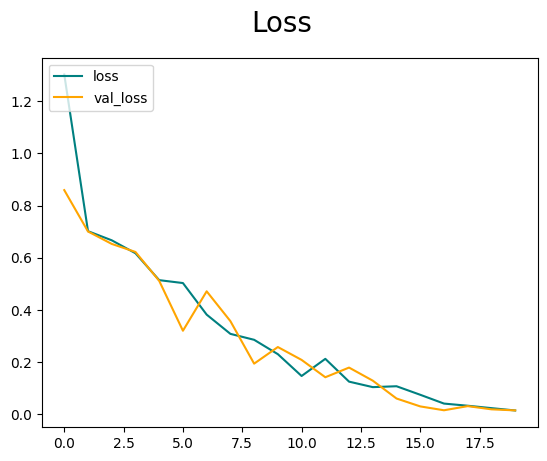

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

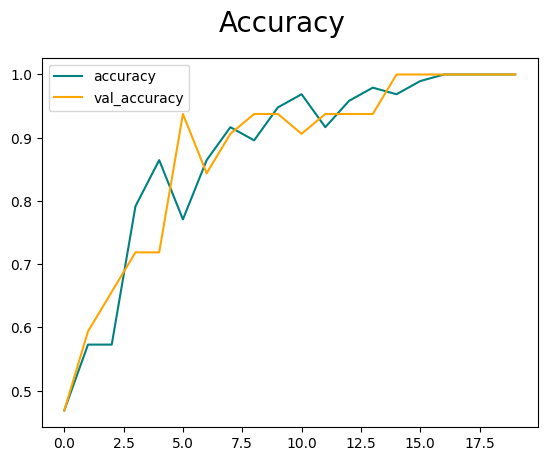

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [ ]:
### Evaluating the model

In [25]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [26]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


In [28]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


In [ ]:
### test with any image (jpg)

In [29]:
import cv2

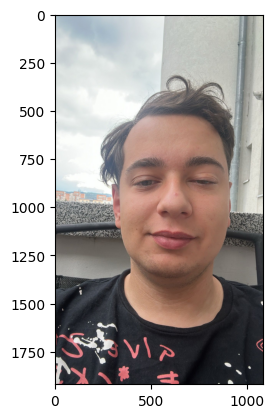

In [42]:
img1 = cv2.imread('happiestv3.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

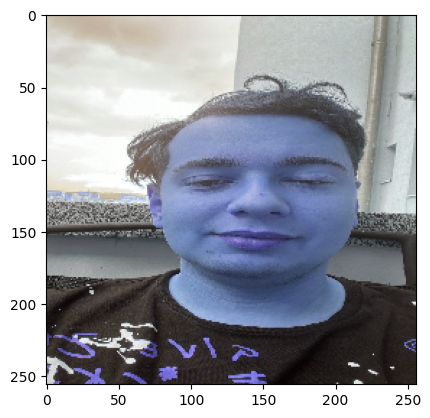

In [43]:
resize = tf.image.resize(img1, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [47]:
if yhat > 0.5:
    print(f'This is a sad person')
else:
    print(f'This is a happy person')

This is a sad person


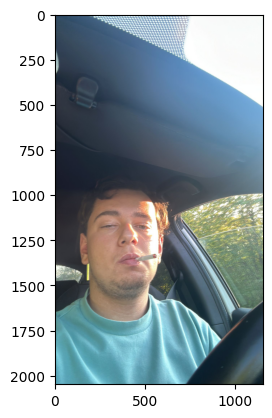

In [34]:
img2 = cv2.imread('verysad.jpg')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

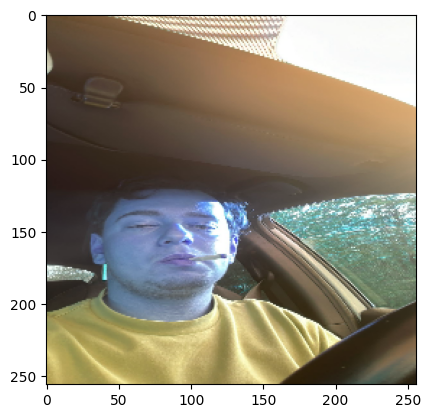

In [35]:
resized = tf.image.resize(img2, (256,256))
plt.imshow(resized.numpy().astype(int))
plt.show()

In [36]:
yhat1 = model.predict(np.expand_dims(resized/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [37]:
if yhat1 > 0.5:
    print(f'This is a sad person')
else:
    print(f'This is a happy person')

This is a sad person


In [ ]:
### Saving the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('../models','happysadmodel.h5'))

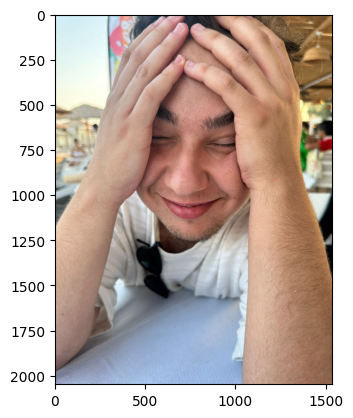

In [50]:
img3 = cv2.imread('happiestv4.jpg')
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

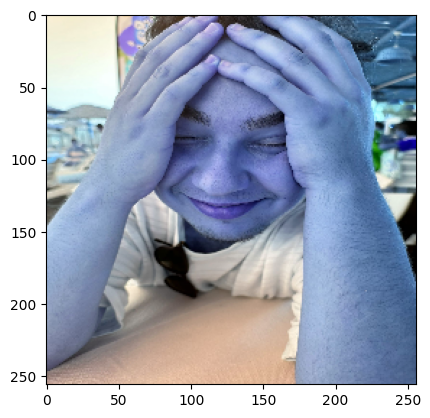

In [51]:
resized1 = tf.image.resize(img3, (256,256))
plt.imshow(resized1.numpy().astype(int))
plt.show()

In [52]:
yhat2 = model.predict(np.expand_dims(resized1/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [53]:
if yhat2 > 0.5:
    print(f'This is a sad person')
else:
    print(f'This is a happy person')

This is a sad person
